Подключаем библиотеки

In [139]:
import time
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('/content/drive/MyDrive/DATA/dataset.csv')

In [141]:
df.head()

,Unnamed: 0,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,...,cmlt_spent_hc_per_grind,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,birthday,sex,is_cheater,has_email,time_confirm_email,target_game_currency
0,0,0.0,0,117,234,2,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
1,1,0.0,125,668,668,1,1448,4,271,28,...,0.000000,0.000000,62.500000,0.000000,NaN,NaN,False,False,NaN,0.0
2,2,0.0,14070,4137,15551,12,41220,119,796,275,...,0.298507,0.298507,210.000000,2.857143,1935-10-22,female,False,False,NaN,0.0
3,3,0.0,0,290,290,1,176,2,44,3,...,0.000000,0.000000,0.000000,0.000000,1987-08-08,female,False,True,NaN,0.0
4,4,0.0,887,1002,1002,1,2448,12,123,121,...,0.000000,0.000000,126.714286,0.000000,NaN,NaN,False,False,NaN,0.0


In [148]:
# create DataFrame for work
df_work = df.copy()

In [149]:
# drop column win count row
df_work = df_work.drop(['Unnamed: 0'], axis = 1)

In [150]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250006 entries, 0 to 250005
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cmlt_daily_game_currency       250006 non-null  float64
 1   cmlt_seconds_with_us           250006 non-null  int64  
 2   cmlt_max_sessions_duration     250006 non-null  int64  
 3   cmlt_sum_sessions_duration     250006 non-null  int64  
 4   cmlt_count_sessions            250006 non-null  int64  
 5   cmlt_sum_quantum_duration      250006 non-null  int64  
 6   cmlt_count_quant               250006 non-null  int64  
 7   cmlt_max_quantum_duration      250006 non-null  int64  
 8   cmlt_max_quant                 250006 non-null  int64  
 9   cmlt_final_level               250006 non-null  int64  
 10  cmlt_count_grind               250006 non-null  int64  
 11  cmlt_max_grind                 250006 non-null  int64  
 12  cmlt_count_won_grind          

Size DataFrame

In [151]:
df_work.shape

(250006, 39)

Count vlues not equel zero in each column

In [7]:
df.astype(bool).sum(axis=0)

cmlt_daily_game_currency           4835
cmlt_seconds_with_us             187835
cmlt_max_sessions_duration       250006
cmlt_sum_sessions_duration       250006
cmlt_count_sessions              250006
cmlt_sum_quantum_duration        207246
cmlt_count_quant                 207246
cmlt_max_quantum_duration        207246
cmlt_max_quant                   207246
cmlt_final_level                 250006
cmlt_count_grind                 207246
cmlt_max_grind                   207246
cmlt_count_won_grind             206057
cmlt_hard_buy                      4727
cmlt_hard_earn                   166791
cmlt_hard_gift                   230864
cmlt_hard_spent                   79057
cmlt_hard_max_spent               79057
country                          250006
country_top_tier                 123327
network_name                     250006
date_install                     250006
first_command_time               250006
cmlt_time_4grind                 207246
cmlt_time_with_us_4grind         187835


Проверим количество уникальных значений в каждой колонке

In [8]:
df.nunique()

cmlt_daily_game_currency            576
cmlt_seconds_with_us              74344
cmlt_max_sessions_duration        16404
cmlt_sum_sessions_duration        45566
cmlt_count_sessions                 130
cmlt_sum_quantum_duration         37932
cmlt_count_quant                   1120
cmlt_max_quantum_duration          4806
cmlt_max_quant                     3027
cmlt_final_level                    119
cmlt_count_grind                    669
cmlt_max_grind                     3976
cmlt_count_won_grind                467
cmlt_hard_buy                       343
cmlt_hard_earn                      122
cmlt_hard_gift                       63
cmlt_hard_spent                     911
cmlt_hard_max_spent                 455
country                             216
country_top_tier                      2
network_name                         13
date_install                         90
first_command_time               245466
cmlt_time_4grind                  96448
cmlt_time_with_us_4grind         110912


Подсчитаю NaN значения

In [9]:
df.isna().sum()

cmlt_daily_game_currency              0
cmlt_seconds_with_us                  0
cmlt_max_sessions_duration            0
cmlt_sum_sessions_duration            0
cmlt_count_sessions                   0
cmlt_sum_quantum_duration             0
cmlt_count_quant                      0
cmlt_max_quantum_duration             0
cmlt_max_quant                        0
cmlt_final_level                      0
cmlt_count_grind                      0
cmlt_max_grind                        0
cmlt_count_won_grind                  0
cmlt_hard_buy                         0
cmlt_hard_earn                        0
cmlt_hard_gift                        0
cmlt_hard_spent                       0
cmlt_hard_max_spent                   0
country                              56
country_top_tier                      0
network_name                      25156
date_install                          0
first_command_time                    0
cmlt_time_4grind                      0
cmlt_time_with_us_4grind              0


**Встречаются только в формате object. При этом целевая метка несбалансирована и большую часть составляет 0**

# Create dataframe without NaN

In [65]:
df_with_nan = df.dropna(axis=0)

In [66]:
df_with_nan.shape

(3077, 39)

# Подготовка данных

In [10]:
# создаю датасет для работы
df_work = df.copy()

In [11]:
# датафрейм где будут храниться подготовленные данные
prepare_data = pd.DataFrame()

In [12]:
# выделю числовые колонки
futures_number = df_work.select_dtypes(include=['int64', 'float64']).columns

In [13]:
# выделю колонки типа object
futures_object = df_work.select_dtypes(include=['object']).columns

In [14]:
# # future_rf = ['cmlt_hard_buy', 'cmlt_daily_game_currency', 'cmlt_hard_spent', 'cmlt_winrate', 'cmlt_max_grind', 'cmlt_max_quant', 'cmlt_seconds_with_us', 'cmlt_final_level',
# 'cmlt_hard_med_spent', 'cmlt_count_won_grind', 'cmlt_count_quant', 'cmlt_sum_sessions_duration', 'cmlt_count_grind', 'cmlt_avg_time_for_level',
# 'cmlt_seconds_div_active_time', 'cmlt_avg_duration', 'cmlt_max_quantum_duration', 'cmlt_max_sessions_duration', 'cmlt_time_4grind', 'cmlt_time_with_us_4grind',
# 'cmlt_sum_quantum_duration', 'cmlt_count_sessions', 'cmlt_hard_earn', 'cmlt_avg_grind_duration', 'cmlt_hard_max_spent']

Создам датафрейм с числовыми данными и выделю target

In [15]:
X_num = df_work[futures_number]

X_num = X_num.drop(['target_game_currency'], axis = 1)

y = df_work['target_game_currency']

Построю корреляцию Пирсона для числовых значений

In [16]:
mask = np.zeros_like(X_num.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

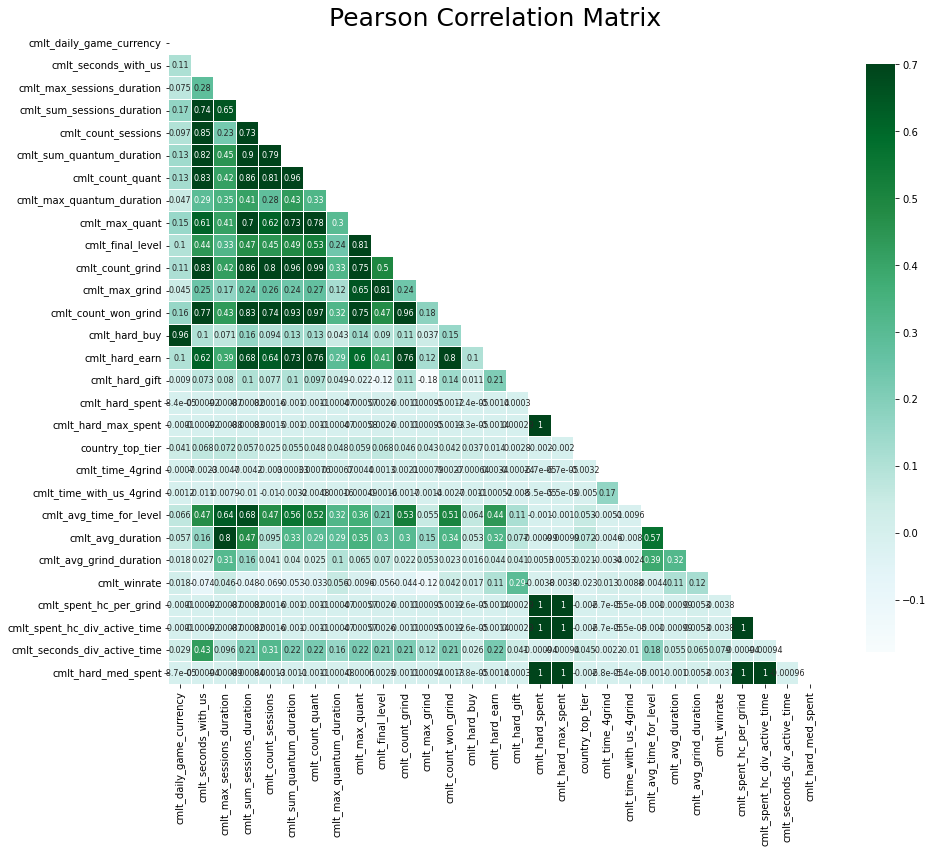

In [17]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)


sns.heatmap(X_num.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Нормализую числовые данные

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_num)
scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaled, columns = X_num.columns)

In [19]:
# добавим в базу с подготовленными данными
prepare_data = pd.concat([prepare_data, X_num_scaled])

Подготовим DataFrame c данными дат. Все колонки переведем в UNIX данные 

In [20]:
prepare_data_date = pd.DataFrame()

In [21]:
df_work['date_install'] = pd.to_datetime(df_work['date_install'])
prepare_data_date['date_install'] = df_work['date_install'].astype(np.int64)

In [22]:
df_work['first_command_time'] = pd.to_datetime(df_work['first_command_time'])
prepare_data_date['first_command_time'] = df_work['first_command_time'].astype(np.int64)

С колонкой даты рождения необходимо заполнить NaN знаения. Сначало создадим колонку с возрастом, NaN значение заполним средним значением.

In [23]:
now_date = datetime.today()

In [24]:
# вычисление наиболее часто встречающегося значения
df_work['birthday'] = pd.to_datetime(df_work['birthday'])

In [25]:
df_work['age'] = df_work['birthday'].apply(lambda x: now_date.year - x.year - ((now_date.month, now_date.day) < (x.month, x.day)))

In [26]:
median_value=int(df_work['age'].median())

In [27]:
df_work['age'].fillna(value=median_value, inplace=True)

In [28]:
df_work = df_work.drop(['birthday'], axis=1)

После переходим к time_confirm_email. Из полученного значения вычислем разницу после регистрации и подтверждения. Пропущенные значения считаем что подтверждение не пришло и заполняем сегодняшней датой.

In [29]:
df_work['time_confirm_email'] = df_work['time_confirm_email'].fillna(str(datetime.now()))

In [30]:
df_work['time_confirm_email'] = pd.to_datetime(df_work['time_confirm_email'])

In [31]:
prepare_data_date['delta_email'] = (df_work['time_confirm_email'].astype(int) - df_work['first_command_time'].astype(int))

Далее необходимо эти данные так же нормализовать и соединить с общей таблицей

In [32]:
scaler = MinMaxScaler()
scaler.fit(prepare_data_date)
scaled = scaler.fit_transform(prepare_data_date)
prepare_data_date_scaled = pd.DataFrame(scaled, columns = prepare_data_date.columns)

In [33]:
prepare_data = pd.concat([prepare_data, prepare_data_date_scaled], axis = 1)

In [34]:
prepare_data.shape

(250006, 32)

Далее займемся булевыми данными

In [35]:
# получим наиболее часто встречающиеся значение и сохраним его в переменную
cheat_count = df_work['is_cheater'].value_counts().index[0]

In [36]:
# заполним пропущенные значения
df_work['is_cheater'] = df_work['is_cheater'].fillna(cheat_count)

In [37]:
# добавим в общий датафрейм
prepare_data['is_cheater'] = (df_work['is_cheater'] != cheat_count).astype(int)

In [38]:
df_work['has_email'].value_counts()

False    205316
True      39031
Name: has_email, dtype: int64

In [39]:
# получим наиболее часто встречающиеся значение и сохраним его в переменную
mail_count = df_work['has_email'].value_counts().index[0]

In [40]:
# заполним пропущенные значения
df_work['has_email'] = df_work['has_email'].fillna(mail_count)

In [41]:
# добавим в общий датафрейм
prepare_data['has_email'] = (df_work['has_email'] != mail_count).astype(int)

Подготовка текстовых данных. Возьмем колонки country, network_name и sex

In [42]:
df_work_oht = df_work[['country', 'network_name', 'sex']]

In [43]:
df_work_oht = df_work_oht.fillna('other')

In [44]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_work_oht))
OH_cols.index = df_work_oht.index

Соединим все в один DataFrame

In [45]:
prepare_data = pd.concat([prepare_data, OH_cols], axis=1)

In [46]:
prepare_data.shape

(250006, 268)

# Undersampling

Понижу выборку за счет данных не имеющих дохода

In [47]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

not_zero_target = (df_work['target_game_currency'] > 0).astype(int)

df_for_res = prepare_data.copy()

df_for_res['target_game_currency'] = df_work['target_game_currency']

print('Original dataset shape %s' % Counter(not_zero_target))

rus = RandomUnderSampler(random_state=56)

X_res, y_res = rus.fit_resample(df_for_res, not_zero_target)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 240920, 1: 9086})
Resampled dataset shape Counter({0: 9086, 1: 9086})


In [48]:
y_res = X_res['target_game_currency']
X_res = X_res.drop(['target_game_currency'], axis = 1)

Так же создам вторую выборку только с значениями где есть доход

In [54]:
X_prof = X_res[y_res>0]

In [55]:
y_prof = y_res[y_res>0]

#Машинное обучение


Посмотрел пять моделей для регрессии - Линейную, Дерево решений, Лассо, Ridge и k-nearest neighbors c использованием кросс-валидации. Получил достаточно высокий MAE. После этого решил заняться оптимизацией Random forest

### Xgboost

1. На несбалансированной выборке

In [ ]:
from xgboost import XGBRegressor

In [ ]:
%%time
model = XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -638.165 (45.599)
CPU times: user 829 ms, sys: 523 ms, total: 1.35 s
Wall time: 1min 34s


2. Cбалансированная выборка

In [ ]:
%%time

model = XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_res, y_res, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8048.082 (654.745)
CPU times: user 327 ms, sys: 71.7 ms, total: 398 ms
Wall time: 25.7 s


### LightGBM

In [ ]:
from lightgbm import LGBMRegressor

1. На несбалансированной выборке

In [ ]:
%%time
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -642.631 (47.192)
CPU times: user 1.33 s, sys: 630 ms, total: 1.96 s
Wall time: 3min 3s


2. Cбалансированная выборка

In [ ]:
%%time
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_res, y_res, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8145.282 (571.600)
CPU times: user 321 ms, sys: 113 ms, total: 435 ms
Wall time: 20.3 s


### CatBoost

In [57]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [58]:
from catboost import CatBoostRegressor

In [ ]:
%%time
model = CatBoostRegressor(verbose=0, n_estimators=100,task_type="GPU")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -686.247 (46.862)
CPU times: user 779 ms, sys: 436 ms, total: 1.22 s
Wall time: 1min 20s


In [ ]:
%%time
model = CatBoostRegressor(verbose=0, n_estimators=100, task_type="GPU")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_res, y_res, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8062.732 (597.420)
CPU times: user 283 ms, sys: 50.4 ms, total: 333 ms
Wall time: 26.2 s


#Look data prof

In [59]:
%%time
model = CatBoostRegressor(verbose=0, n_estimators=100, task_type="GPU")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_prof, y_prof, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -15276.453 (1132.310)
CPU times: user 333 ms, sys: 90.6 ms, total: 424 ms
Wall time: 37.9 s


DataFrame drop NaN

In [67]:
X_drop_nan = df_with_nan.drop(['target_game_currency'], axis=1)

In [68]:
y_drop_nan = df_with_nan['target_game_currency']

In [74]:
categorical_var_nan = np.where(X_drop_nan.dtypes == np.object)[0]

In [86]:
cat_var_nan = X_drop_nan.columns[np.where(X_drop_nan.dtypes == np.object)[0]]

In [80]:
num_var_nan = X_drop_nan.columns[np.where(X_drop_nan.dtypes != np.object)[0]]

In [82]:
scaler_nan = MinMaxScaler()
scaler_nan.fit(X_drop_nan[num_var_nan])
scaled_nan = scaler.fit_transform(X_drop_nan[num_var_nan])
X_scaled_nan = pd.DataFrame(scaled_nan, columns = num_var_nan)

In [ ]:
X_cat_nun = X_drop_nan[cat_var_nan].reset_index()
X_cat_nun = X_cat_nun.drop(['index'], axis = 1)

In [115]:
X_all_nan = pd.concat([X_scaled_nan, X_cat_nun], axis = 1)

In [116]:
X_all_nan.shape

(3077, 38)

In [117]:
X_train_nan, X_test_nan, y_train_nan, y_test_nan = train_test_split(X_all_nan, y_drop_nan, test_size=0.2, random_state=56)

In [118]:
model_nan = CatBoostRegressor(depth =  10, iterations = 100, learning_rate = 0.1, task_type="GPU")

In [133]:
cat_var_nan_new = np.where(X_all_nan.dtypes == np.object)[0]

In [128]:
X_train_nan[cat_var_nan] = X_train_nan[cat_var_nan].astype(str)

In [134]:
model_nan.fit(X_train_nan,y_train_nan,cat_features = cat_var_nan_new,plot=False)

0:	learn: 19318.7085691	total: 29.8ms	remaining: 2.95s
1:	learn: 18817.5558543	total: 55.5ms	remaining: 2.72s
2:	learn: 18380.4148800	total: 82.5ms	remaining: 2.67s
3:	learn: 17853.4154161	total: 108ms	remaining: 2.6s
4:	learn: 17512.8565592	total: 135ms	remaining: 2.56s
5:	learn: 17153.1667230	total: 161ms	remaining: 2.53s
6:	learn: 16825.0620223	total: 187ms	remaining: 2.48s
7:	learn: 16472.6694490	total: 215ms	remaining: 2.47s
8:	learn: 16199.9199817	total: 242ms	remaining: 2.44s
9:	learn: 15899.3109985	total: 262ms	remaining: 2.35s
10:	learn: 15653.6373130	total: 279ms	remaining: 2.26s
11:	learn: 15381.4371333	total: 297ms	remaining: 2.17s
12:	learn: 15107.3477512	total: 315ms	remaining: 2.1s
13:	learn: 14794.6242347	total: 333ms	remaining: 2.04s
14:	learn: 14526.1303915	total: 352ms	remaining: 1.99s
15:	learn: 14269.6895632	total: 361ms	remaining: 1.9s
16:	learn: 14067.0999972	total: 379ms	remaining: 1.85s
17:	learn: 13855.3249618	total: 396ms	remaining: 1.8s
18:	learn: 13639.2432

In [135]:
y_pred_nan = model_nan.predict(X_test_nan)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_nan, y_pred_nan))

Mean Absolute Error (MAE): 3473.8704348579745


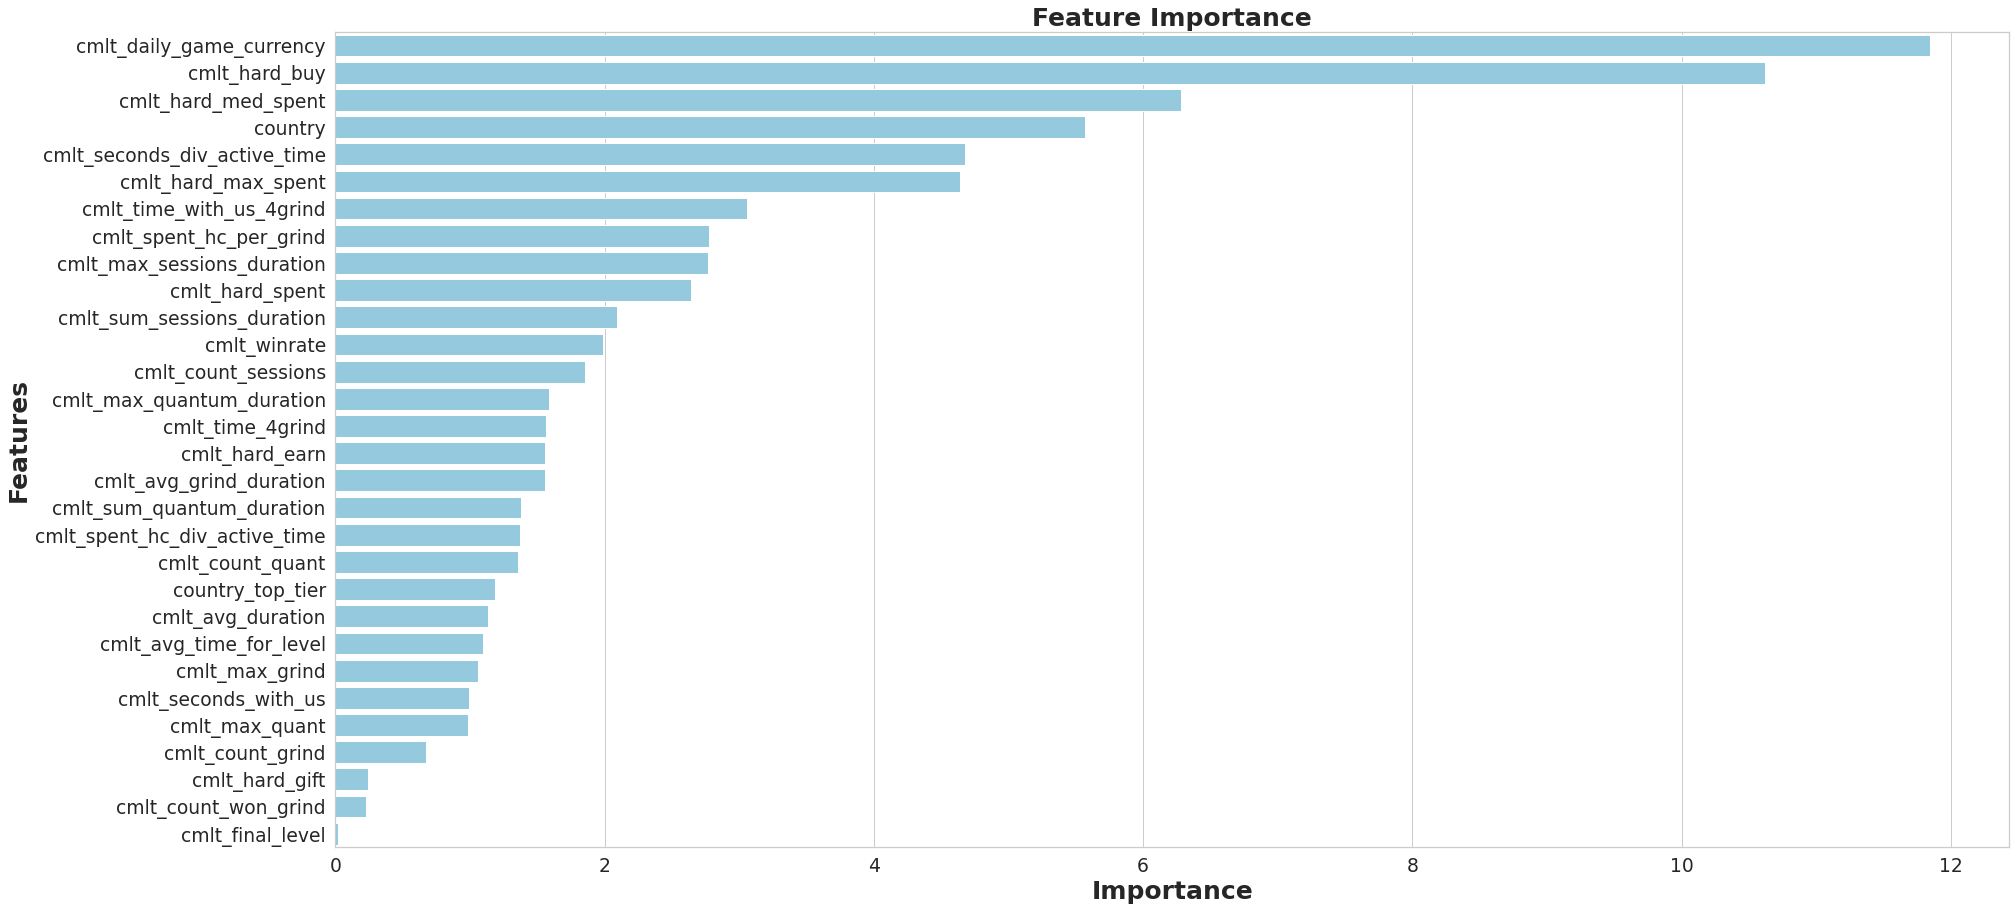

None

,Features,Gini-Importance
0,cmlt_daily_game_currency,11.842426
1,cmlt_hard_buy,10.616463
2,cmlt_hard_med_spent,6.284531
3,country,5.568525
4,cmlt_seconds_div_active_time,4.675550
5,cmlt_hard_max_spent,4.641792
6,cmlt_time_with_us_4grind,3.055407
7,cmlt_spent_hc_per_grind,2.773879
8,cmlt_max_sessions_duration,2.767862
9,cmlt_hard_spent,2.641206


In [136]:
feats = {}
for feature, importance in zip(X_train_nan.columns[:30], model_nan.feature_importances_[:30]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Без предобработки и семплинга

In [ ]:
df_X = df.drop(['target_game_currency', 'cmlt_daily_game_currency', 'cmlt_hard_buy', 'cmlt_hard_max_spent'], axis=1)
target_y = df['target_game_currency']

In [ ]:
df_X[df_X.select_dtypes(include=['object']).columns] = df_X.select_dtypes(include=['object']).astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, target_y, test_size=0.2, random_state=56)

In [ ]:
categorical_var = np.where(df_X.dtypes == np.object)[0]

In [ ]:
model = CatBoostRegressor(depth =  10, iterations = 100, learning_rate = 0.1, task_type="GPU")

In [ ]:
model.fit(X_train,y_train,cat_features = categorical_var,plot=False)

0:	learn: 8636.1680968	total: 33ms	remaining: 3.27s
1:	learn: 8506.5886991	total: 65.3ms	remaining: 3.2s
2:	learn: 8360.5982857	total: 99.2ms	remaining: 3.21s
3:	learn: 8226.0010775	total: 134ms	remaining: 3.21s
4:	learn: 8086.0938472	total: 182ms	remaining: 3.45s
5:	learn: 7970.6513767	total: 217ms	remaining: 3.4s
6:	learn: 7866.1354443	total: 244ms	remaining: 3.24s
7:	learn: 7774.0669339	total: 269ms	remaining: 3.09s
8:	learn: 7677.9869338	total: 292ms	remaining: 2.95s
9:	learn: 7598.1144227	total: 314ms	remaining: 2.83s
10:	learn: 7503.0162134	total: 337ms	remaining: 2.73s
11:	learn: 7422.0862357	total: 360ms	remaining: 2.64s
12:	learn: 7349.5954638	total: 382ms	remaining: 2.56s
13:	learn: 7270.5768002	total: 403ms	remaining: 2.48s
14:	learn: 7195.9841280	total: 424ms	remaining: 2.4s
15:	learn: 7134.1503279	total: 447ms	remaining: 2.35s
16:	learn: 7076.8479803	total: 465ms	remaining: 2.27s
17:	learn: 7024.6525988	total: 482ms	remaining: 2.2s
18:	learn: 6968.6069370	total: 500ms	rema

In [ ]:
y_pred = model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 694.8870388733219


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'depth'         : [10, 50, 100],
              'learning_rate' : [0.1, 0.5, 0.8],
              'iterations'    : [100, 500, 1000]
              }

In [ ]:
model_CBR = CatBoostRegressor(task_type="GPU")

In [ ]:
grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 3, n_jobs=-1)
grid.fit(prepare_data, y)

0:	learn: 8571.8270108	total: 20ms	remaining: 1.98s
1:	learn: 8411.2751671	total: 38.7ms	remaining: 1.9s
2:	learn: 8252.7140936	total: 57.5ms	remaining: 1.86s
3:	learn: 8120.9996151	total: 75.1ms	remaining: 1.8s
4:	learn: 7980.6814326	total: 94ms	remaining: 1.78s
5:	learn: 7876.4953776	total: 113ms	remaining: 1.77s
6:	learn: 7778.2074267	total: 133ms	remaining: 1.76s
7:	learn: 7666.3899565	total: 152ms	remaining: 1.75s
8:	learn: 7552.4024724	total: 171ms	remaining: 1.73s
9:	learn: 7461.9040609	total: 190ms	remaining: 1.71s
10:	learn: 7400.4452719	total: 208ms	remaining: 1.68s
11:	learn: 7314.5944510	total: 226ms	remaining: 1.66s
12:	learn: 7238.1915604	total: 239ms	remaining: 1.6s
13:	learn: 7159.7516670	total: 252ms	remaining: 1.54s
14:	learn: 7101.9825119	total: 265ms	remaining: 1.5s
15:	learn: 7059.0976846	total: 277ms	remaining: 1.45s
16:	learn: 6987.5808052	total: 290ms	remaining: 1.42s
17:	learn: 6936.6396928	total: 302ms	remaining: 1.38s
18:	learn: 6892.0078523	total: 315ms	rema

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f5f1f1fcd50>,
             n_jobs=-1,
             param_grid={'depth': [10, 50, 100], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.1, 0.5, 0.8]})

In [ ]:
grid.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prepare_data, y, test_size=0.2, random_state=56)

In [ ]:
model = CatBoostRegressor(iterations=100, depth=10,  learning_rate=0.1, random_seed=56, logging_level='Silent')
model.fit(X_train, y_train, use_best_model=True, early_stopping_rounds=10)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


In [ ]:
y_pred = model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 657.0828296728088


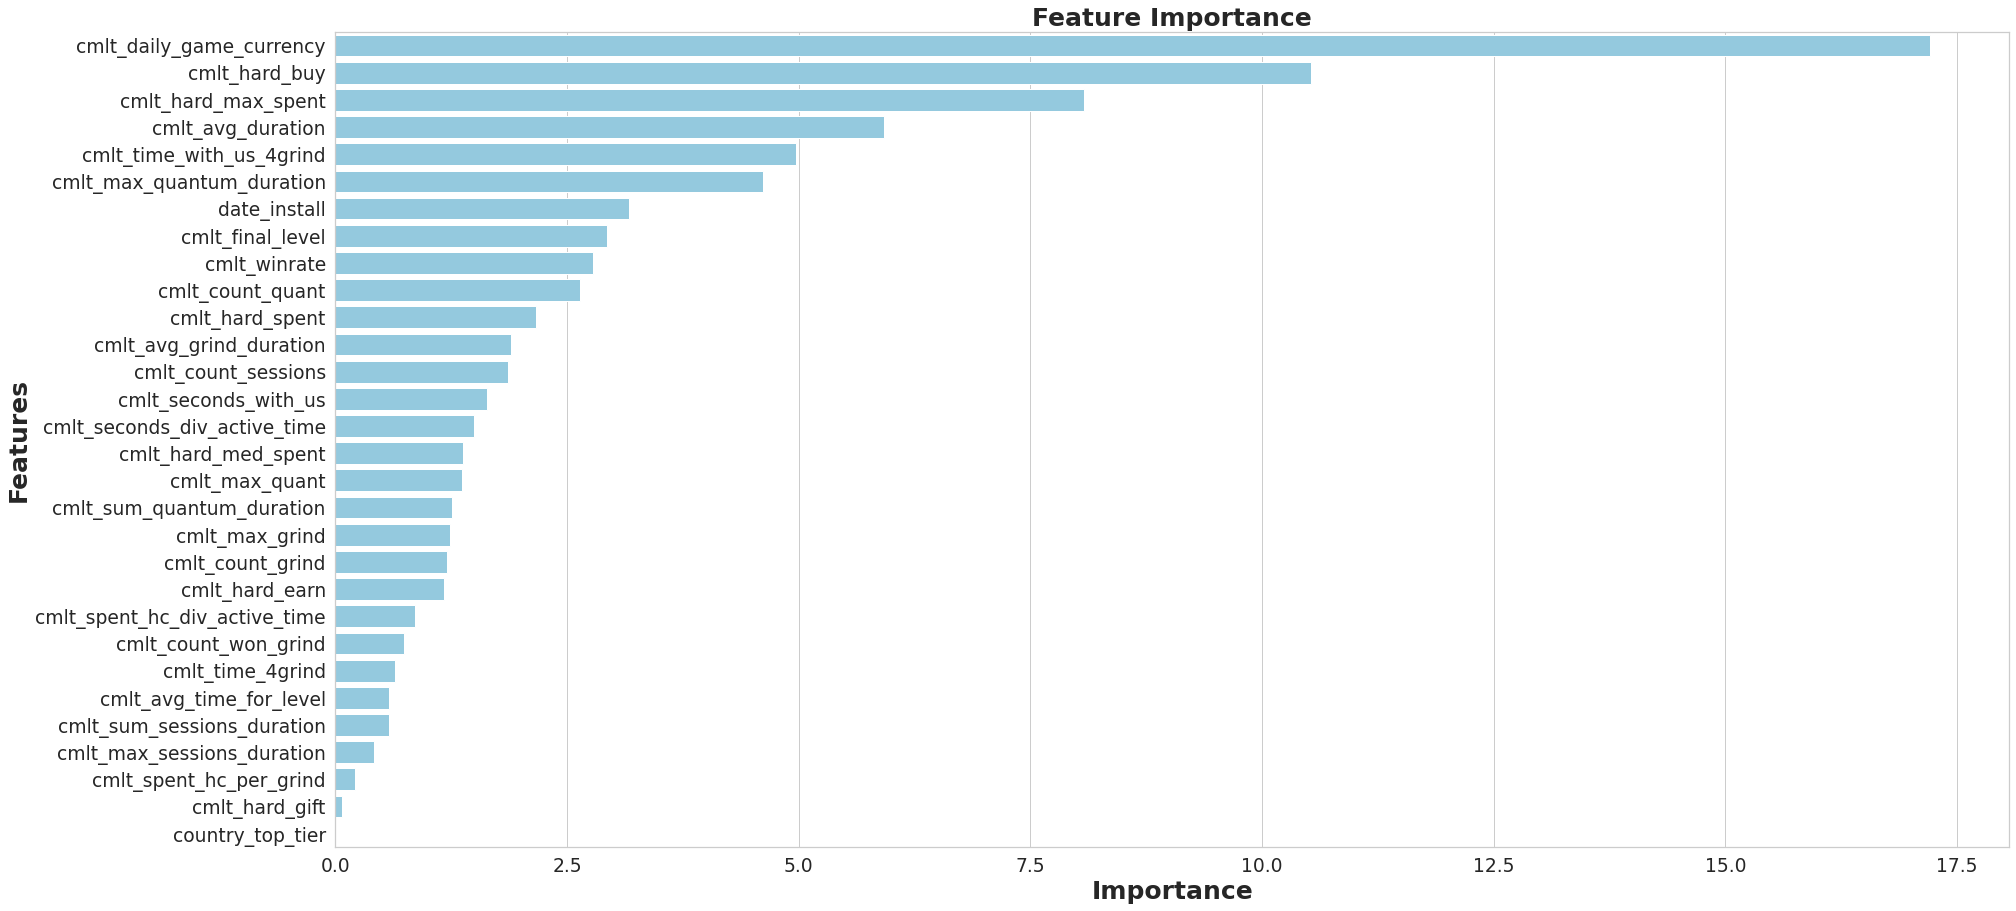

None

,Features,Gini-Importance
0,cmlt_daily_game_currency,17.205394
1,cmlt_hard_buy,10.525804
2,cmlt_hard_max_spent,8.074434
3,cmlt_avg_duration,5.916306
4,cmlt_time_with_us_4grind,4.968149
5,cmlt_max_quantum_duration,4.617215
6,date_install,3.168639
7,cmlt_final_level,2.928632
8,cmlt_winrate,2.777202
9,cmlt_count_quant,2.640198


In [ ]:
feats = {}
for feature, importance in zip(X_train.columns[:30], model.feature_importances_[:30]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time

model = RandomForestRegressor(max_depth=15)

n_scores = cross_val_score(model, prepare_data, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise', verbose=1)

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


MAE: -8429.324 (5771.982)
CPU times: user 635 ms, sys: 126 ms, total: 761 ms
Wall time: 2min 21s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prepare_data, y, test_size=0.2, random_state=56)

In [ ]:
forest = RandomForestRegressor(max_depth=15)
forest.fit(X_train, y_train)


RandomForestRegressor(max_depth=15)

In [ ]:
y_pred = forest.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 8417.268713192509


Посмотрим важность признаков

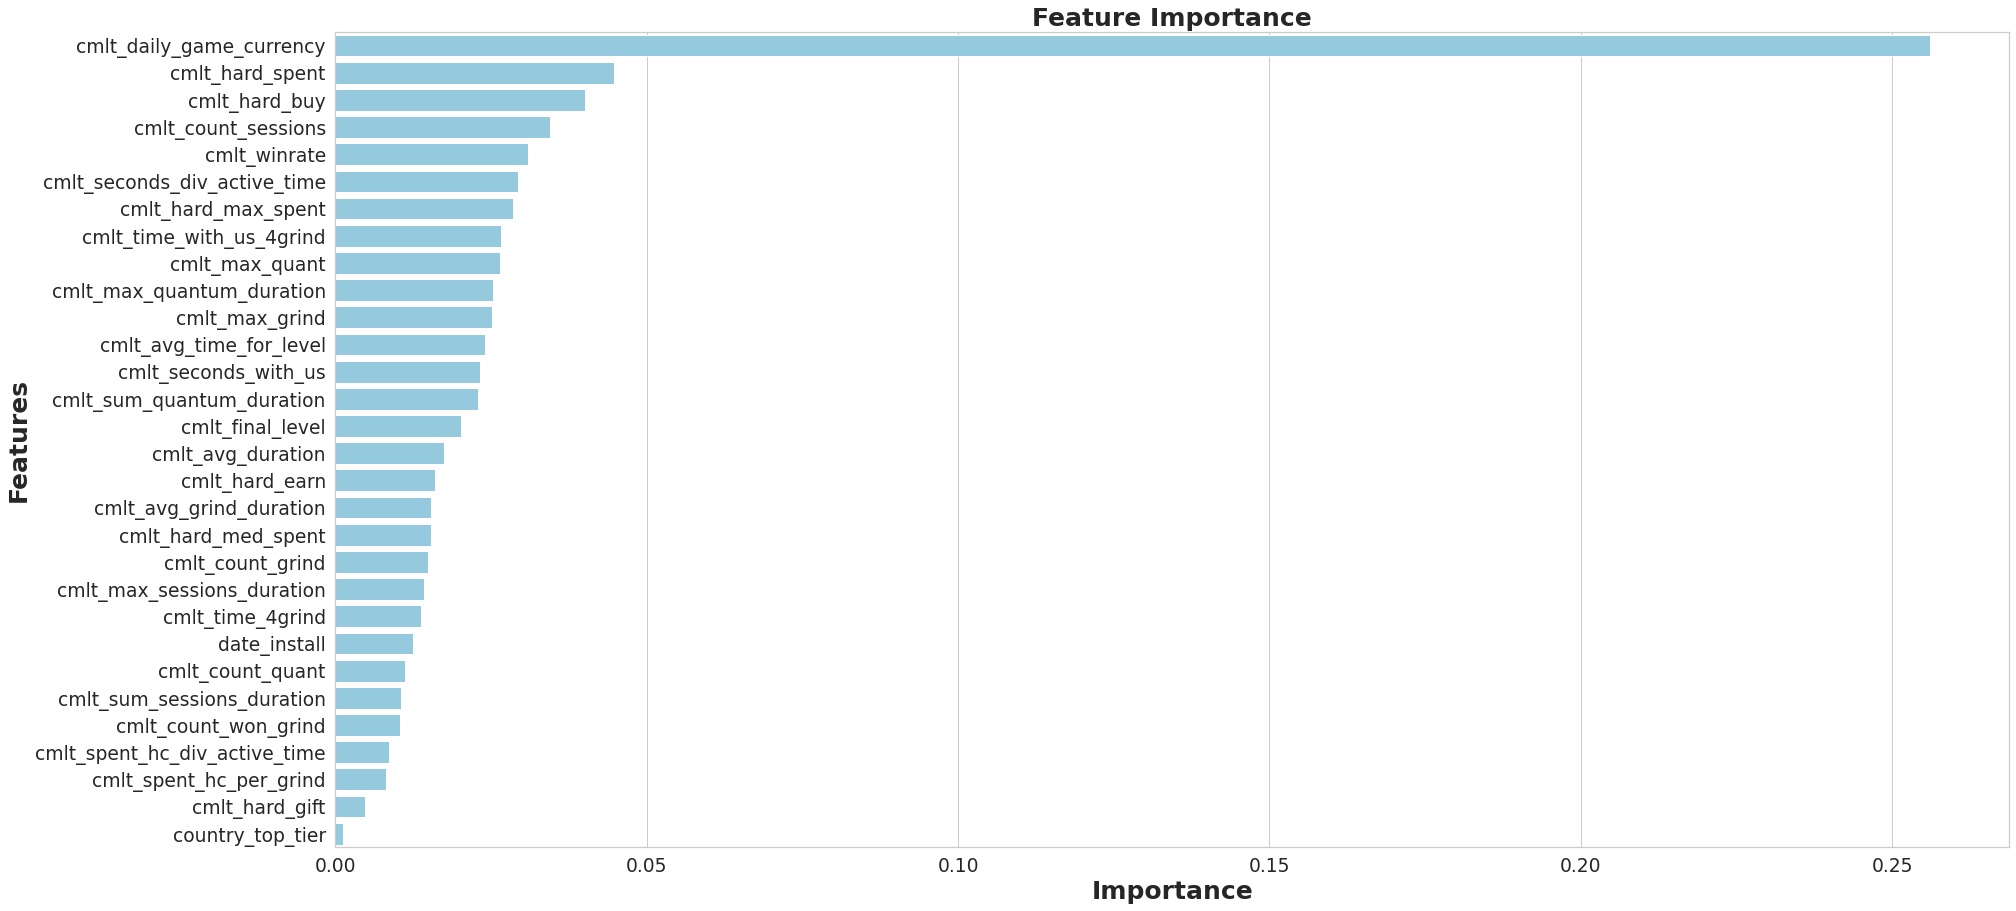

None

,Features,Gini-Importance
0,cmlt_daily_game_currency,0.256026
1,cmlt_hard_spent,0.044802
2,cmlt_hard_buy,0.040165
3,cmlt_count_sessions,0.034533
4,cmlt_winrate,0.030913
5,cmlt_seconds_div_active_time,0.029342
6,cmlt_hard_max_spent,0.028595
7,cmlt_time_with_us_4grind,0.026631
8,cmlt_max_quant,0.026486
9,cmlt_max_quantum_duration,0.025401


In [ ]:
feats = {}
for feature, importance in zip(X_train.columns[:30], forest.feature_importances_[:30]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Теперь применем метод главных компонент

In [ ]:
from sklearn.decomposition import PCA

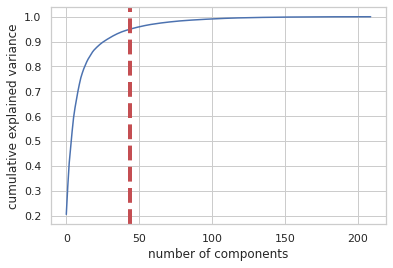

None

In [ ]:
pca_test = PCA(n_components=210)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=44, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [ ]:
display(pca_df[40:50].head(10))

,Cumulative Variance Ratio,Explained Variance Ratio
40,0.943268,0.002063
41,0.945116,0.001849
42,0.946926,0.001810
43,0.948679,0.001753
44,0.950372,0.001693
45,0.952051,0.001680
46,0.953669,0.001617
47,0.955241,0.001572
48,0.956731,0.001490
49,0.958123,0.001392


Если взглянуть на вышеприведённый датафрейм, то окажется, что использование PCA для перехода от 210 переменных к 44 компонентам позволяет объяснить 95% дисперсии данных. 

In [ ]:
pca = PCA(n_components=44)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Поcмотрим веса для каждой компоненты

In [ ]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=X_train.columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
cmlt_daily_game_currency,0.003927,-0.003055,-0.000764,-0.000483,0.001600,0.001660,0.004566,0.016594,0.010126,0.001425
cmlt_seconds_with_us,0.071538,0.004569,-0.036910,0.014422,0.063755,0.003242,0.248441,0.331909,0.172267,-0.011052
cmlt_max_sessions_duration,0.021348,0.002946,-0.005080,0.010513,0.012453,0.000398,0.023224,0.058268,0.028714,-0.006517
cmlt_sum_sessions_duration,0.026577,0.011540,-0.013192,0.013092,0.025786,-0.002723,0.076454,0.123122,0.057552,-0.005896
cmlt_count_sessions,0.027283,0.014787,-0.012124,0.012318,0.026549,-0.005061,0.100024,0.133290,0.064869,0.000479
...,...,...,...,...,...,...,...,...,...,...
171,-0.015244,-0.025806,0.185652,0.070409,0.047546,-0.045660,-0.214491,0.342030,-0.140441,-0.109906
172,0.070687,-0.030682,0.383265,-0.016226,0.014328,0.024088,0.318990,-0.421652,-0.051087,0.095187
173,0.481786,0.111478,-0.016489,-0.333215,-0.316867,-0.425992,-0.053130,0.000243,-0.031343,-0.154466
174,0.107963,0.134456,0.033597,0.361384,0.350735,0.514802,-0.083470,-0.087672,0.034227,-0.312419


Дальше обучим базовую модель после применения метода главных компонент

In [ ]:
%%time
rfc = RandomForestRegressor(max_depth=15)
rfc.fit(X_train_pca, y_train)
display(rfc.score(X_train_pca, y_train))

0.7226559630731448

CPU times: user 1min, sys: 83.2 ms, total: 1min
Wall time: 59.9 s


In [ ]:
y_pred = rfc.predict(X_test_pca)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 9473.532444529155


Подбор параметров при помощи RandomizedSearchCV не удалось исполнить,так как не хватило мощности на Colab и paperspacegradient на бесплатных версиях.

In [ ]:
%%time
rfc = RandomForestRegressor(max_depth=15, n_estimators = 50, max_features='log2', min_samples_split=50, min_samples_leaf=30, bootstrap=True)
rfc.fit(X_train_pca, y_train)
y_pred = rfc.predict(X_test_pca)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 9204.440945265189
CPU times: user 2.7 s, sys: 1.83 ms, total: 2.7 s
Wall time: 2.69 s


In [ ]:
from xgboost import XGBRegressor

In [ ]:
%%time
model = XGBRegressor()
model.fit(X_train_pca, y_train)

[14:34:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3.88 s, sys: 224 ms, total: 4.11 s
Wall time: 4.4 s


In [ ]:
y_pred = model.predict(X_test_pca)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 9238.345542554263


In [ ]:
%%time
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbr = XGBRegressor(seed = 20, tree_method='gpu_hist')
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=10)
clf.fit(X_train_pca, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.8999999999999999
[14:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5; 1/25] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.8999999999999999;, score=-636387690.367 total time=   3.2s
[CV 2/5; 1/25] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.8999999999999999
[14:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5; 1/25] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_de

KeyboardInterrupt: ignored

In [ ]:
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_split

[2, 7, 12, 18, 23, 28, 34, 39, 44, 50]

In [ ]:
%%time
rfc = RandomForestRegressor(max_depth=15, n_estimators = 100)
rfc.fit(X_train_pca, y_train)
y_pred = rfc.predict(X_test_pca)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 9493.943850426653
CPU times: user 1min 8s, sys: 54.3 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
%%time
rfc = RandomForestRegressor(max_depth=15, n_estimators = 500)
rfc.fit(X_train_pca, y_train)
y_pred = rfc.predict(X_test_pca)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 9450.7836361457
CPU times: user 5min 37s, sys: 331 ms, total: 5min 37s
Wall time: 5min 36s


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)


xgbr.fit(X_train_pca, y_train)
xgbr.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 10, 
                        n_jobs=-1, 
                        random_state=56)
rs.fit(X_train_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
# разделю данные
X_train, X_test, y_train, y_test = train_test_split(prepare_data, y, test_size=0.2, random_state=56)

Первым взял Random Forest Regression. К сожалению попытка его оптимизации не привела к успеху и время выполнения на google colab вышла за рамки допустимого. Не хватило мощности.

###  Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 32819846621.31426


In [ ]:
lr.fit(X_train[future_rf], y_train)

y_pred = lr.predict(X_test[future_rf])

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 1070.2452530484666


In [ ]:
lr = LinearRegression()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=56)

n_scores = cross_val_score(lr, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -12428111062122.850 (21289427291110.219)


In [ ]:
# n_scores = cross_val_score(lr, prepare_data[future_rf], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 848.2586516539341


In [ ]:
dtr.fit(X_train[future_rf], y_train)

y_pred = dtr.predict(X_test[future_rf])

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 842.8055375955875


In [ ]:
dtr = DecisionTreeRegressor()

dtr = DecisionTreeRegressor(random_state=56)

n_scores = cross_val_score(dtr, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -10263.195 (750.261)


In [ ]:
# n_scores = cross_val_score(dtr, prepare_data[future_rf], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 904.4924478708303


In [ ]:
ridge_model.fit(X_train[future_rf], y_train)

y_pred = ridge_model.predict(X_test[future_rf])

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 766.0843484253414


In [ ]:
ridge_model = Ridge()

clf = Ridge()

n_scores = cross_val_score(clf, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8796.833 (341.251)


In [ ]:
# n_scores = cross_val_score(clf, prepare_data[future_rf], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

##Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 858.8035977478307


In [ ]:
lasso_model.fit(X_train[future_rf], y_train)

y_pred = lasso_model.predict(X_test[future_rf])

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 749.1098040113874


In [ ]:
lasso_model = Lasso()

n_scores = cross_val_score(lasso_model, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8650.672 (338.603)


In [ ]:
# n_scores = cross_val_score(lasso_model, prepare_data[future_rf], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

## k-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neigh = KNeighborsRegressor()

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 728.2613515459382


In [ ]:
neigh = KNeighborsRegressor()

neigh.fit(X_train[future_rf], y_train)

y_pred = neigh.predict(X_test[future_rf])

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 724.4016521339146


In [ ]:
neigh = KNeighborsRegressor()

n_scores = cross_val_score(neigh, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8732.983 (478.483)


In [ ]:
# n_scores = cross_val_score(neigh, prepare_data[future_rf], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

##Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR()

svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 510.6060927289649


In [ ]:
svr_model.fit(X_train[future_rf], y_train)

y_pred = svr_model.predict(X_test[future_rf])

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
svr_model = SVR()

n_scores = cross_val_score(svr_model, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
# n_scores = cross_val_score(svr_model, prepare_data[future_rf], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest=RandomForestRegressor()

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
forest.fit(X_train[future_rf], y_train)

y_pred = forest.predict(X_test[future_rf])

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
forest=RandomForestRegressor()

n_scores = cross_val_score(forest, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
# n_scores = cross_val_score(forest, prepare_data[future_rf], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Что еще необходимо сделать:
1. Попыпаться оптимизировать наиболее удачный алгоритм
2. Создать новые признаки
3. Есть подозрения что валюта исследуемая разная и пока не решен вопрос как ее привести к одной
4. Понижение размерности и после этого повторная оптимизация. На colab исполнялось более трех часов.
5. После этого


In [ ]:
model = RandomForestRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=56)

n_scores = cross_val_score(model, prepare_data, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

KeyboardInterrupt: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prepare_data, y, test_size=0.2, random_state=56)

In [ ]:
forest = RandomForestRegressor(random_state=56)

In [ ]:
forest = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 764.9714783501712
Mean Squared Error (MSE): 60857450.24909244
Root Mean Squared Error (RMSE): 7801.118525512379


In [ ]:
# forest = RandomForestRegressor(max_depth=100,
#                                     max_features=5,
#                                     random_state=56)

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(forest, X_train, y_train,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

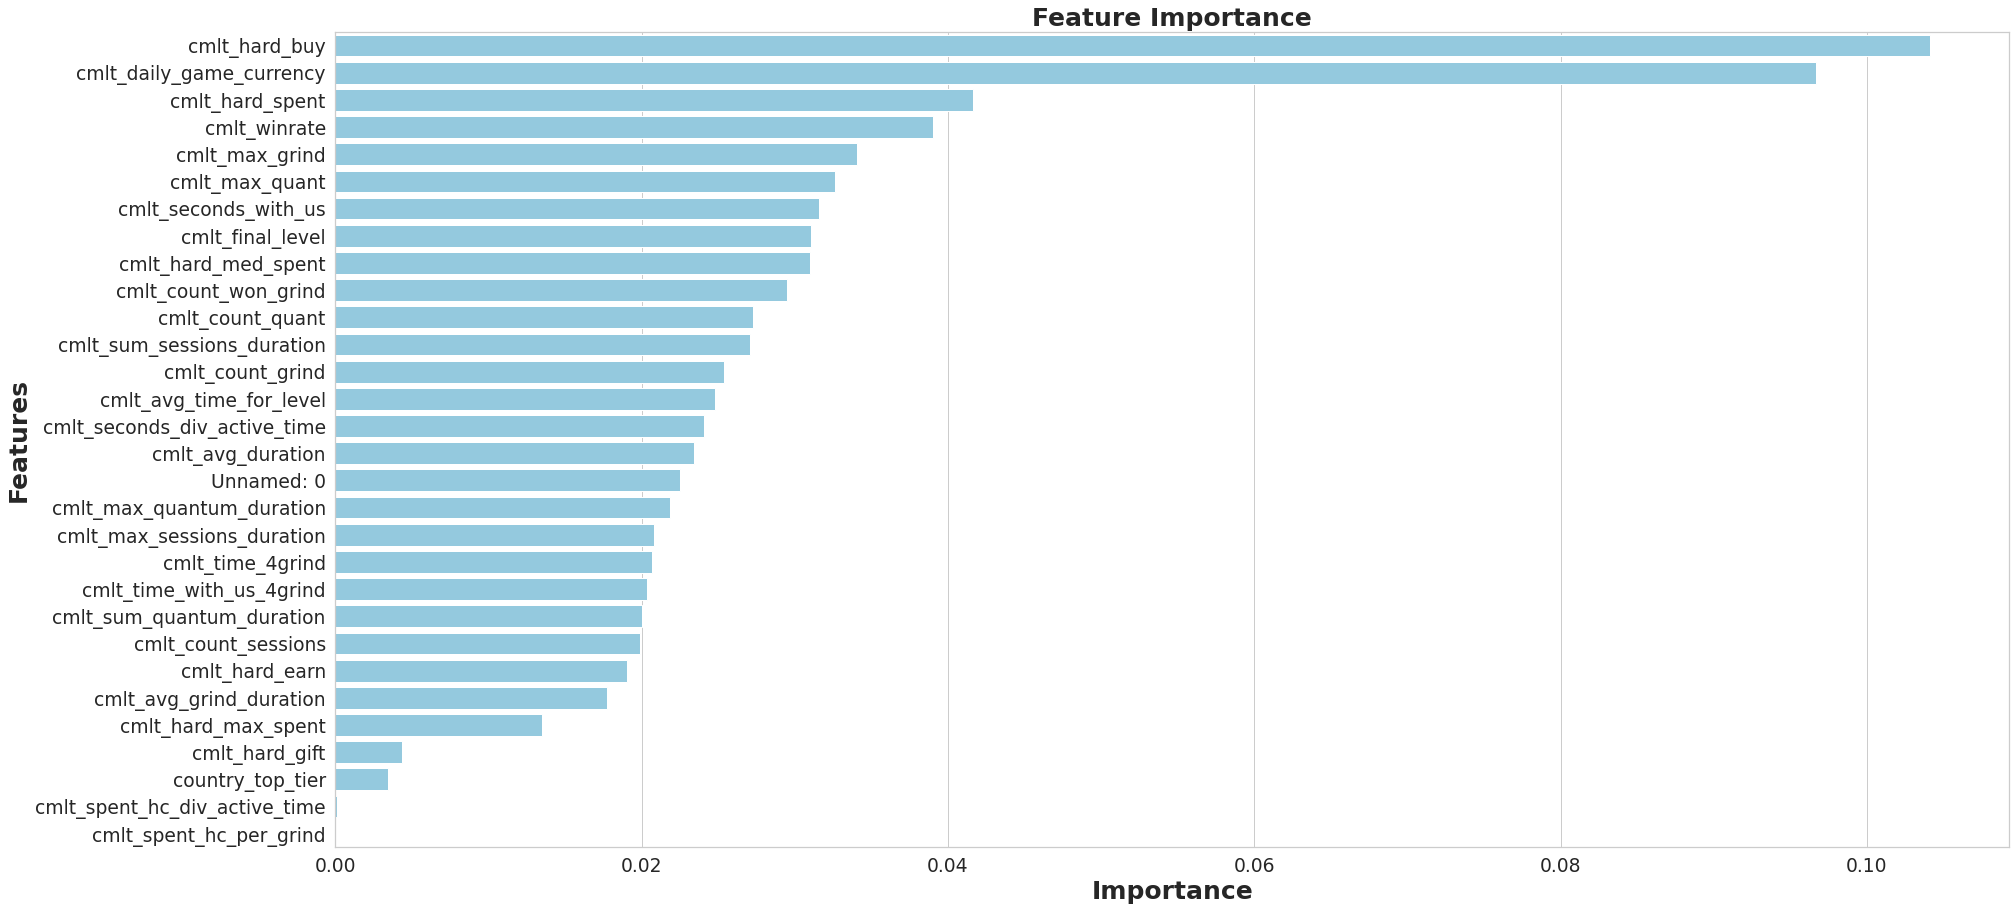

None

,Features,Gini-Importance
0,cmlt_hard_buy,0.104095
1,cmlt_daily_game_currency,0.096686
2,cmlt_hard_spent,0.041625
3,cmlt_winrate,0.038999
4,cmlt_max_grind,0.034036
5,cmlt_max_quant,0.032631
6,cmlt_seconds_with_us,0.031558
7,cmlt_final_level,0.031080
8,cmlt_hard_med_spent,0.030968
9,cmlt_count_won_grind,0.029496


In [ ]:
feats = {}
for feature, importance in zip(X_train.columns[:30], forest.feature_importances_[:30]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [ ]:
df.head()

,Unnamed: 0,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,...,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,birthday,sex,is_cheater,has_email,time_confirm_email,target_game_currency,birthday_without_na
0,0,0.0,0,117,234,2,0,0,0,0,...,0.000000,0.000000,0.000000,NaN,NaN,False,False,2022-06-16 13:29:03.779916,0.0,1973-06-05
1,1,0.0,125,668,668,1,1448,4,271,28,...,0.000000,62.500000,0.000000,NaN,NaN,False,False,2022-06-16 13:29:03.779916,0.0,1973-06-05
2,2,0.0,14070,4137,15551,12,41220,119,796,275,...,0.298507,210.000000,2.857143,1935-10-22,female,False,False,2022-06-16 13:29:03.779916,0.0,1935-10-22
3,3,0.0,0,290,290,1,176,2,44,3,...,0.000000,0.000000,0.000000,1987-08-08,female,False,True,2022-06-16 13:29:03.779916,0.0,1987-08-08
4,4,0.0,887,1002,1002,1,2448,12,123,121,...,0.000000,126.714286,0.000000,NaN,NaN,False,False,2022-06-16 13:29:03.779916,0.0,1973-06-05


In [ ]:
X_train.head()

,Unnamed: 0,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,...,224,225,226,227,228,229,230,231,232,233
41556,0.166221,0.0,0.000000,0.000336,0.000175,0.010101,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
249947,0.999768,0.0,0.001426,0.012480,0.002670,0.005051,0.005692,0.008322,0.005244,0.010885,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129148,0.516582,0.0,0.002370,0.031629,0.005379,0.000000,0.009197,0.015257,0.004568,0.020985,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30667,0.122666,0.0,0.000000,0.001065,0.000181,0.000000,0.000266,0.001387,0.001062,0.000898,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
125759,0.503026,0.0,0.000000,0.000625,0.000106,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


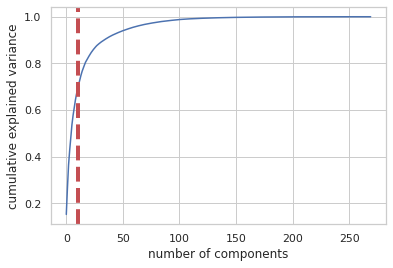

None

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=270)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [ ]:
display(pca_df.head(60))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.151762,0.151762
1,0.264608,0.112846
2,0.364093,0.099485
3,0.427376,0.063283
4,0.483816,0.056440
5,0.537117,0.053301
6,0.576872,0.039755
7,0.609869,0.032997
8,0.640918,0.031049
9,0.667853,0.026935


In [ ]:
pca = PCA(n_components=56)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_train)

In [ ]:
forest = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
forest.fit(X_train_scaled_pca, y_train)
display(forest.score(X_train_scaled_pca, y_train))

0.7808754620344117

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# max_features = ['log2', 'sqrt']
# max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
# min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
# bootstrap = [True, False]
# param_dist = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# rs = RandomizedSearchCV(forest, 
#                         param_dist, 
#                         n_iter = 100, 
#                         cv = 3, 
#                         verbose = 1, 
#                         n_jobs=-1, 
#                         random_state=0)
# rs.fit(X_train_scaled_pca, y_train)
# rs.best_params_

**дальше анализ по оптимизации алгоритма перестал выполнять в связи со скоростью работы**

In [ ]:
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
y_pred = complex_model_R.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 904.6513642687119
Mean Squared Error (MSE): 59627954.047098234
Root Mean Squared Error (RMSE): 7721.9138849833225


In [ ]:
complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(X_train, y_train)

Ridge(alpha=100)

In [ ]:
y_pred = complex_model_R.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 1198.904656907638
Mean Squared Error (MSE): 69724775.95614646
Root Mean Squared Error (RMSE): 8350.13628368702


In [ ]:
complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(X_train, y_train)

Ridge(alpha=1000)

In [ ]:
y_pred = complex_model_R.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 1195.662467476114
Mean Squared Error (MSE): 73489434.96209566
Root Mean Squared Error (RMSE): 8572.597912074008


# Первый анализ

Без нормализации

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=56)

In [ ]:
forest = RandomForestRegressor(random_state=56)

In [ ]:
forest = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 679.04719144336
Mean Squared Error (MSE): 58396873.49080947
Root Mean Squared Error (RMSE): 7641.784705866128


# Второй анализ

После нормализации данных

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_num_scaled, y, test_size=0.2, random_state=56)

In [ ]:
forest = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 679.103722755083
Mean Squared Error (MSE): 57648006.06797586
Root Mean Squared Error (RMSE): 7592.628403127329


**Ошибка только растет**

# Третий анализ

Добавим категориальные данные

In [ ]:
# объеденю с числовыми данными
OH_X = pd.concat([X_num_scaled, OH_cols], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(OH_X, y, test_size=0.2, random_state=56)

In [ ]:
forest = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 748.3581601494649
Mean Squared Error (MSE): 59559403.67072525
Root Mean Squared Error (RMSE): 7717.473917722382


**Ошибка только растет**

# Четвертый анализ

Оставим только датафрейм где предсказываемое значение не равно 0

In [ ]:
df_profit = df[df['target_game_currency']>0]

In [ ]:
df_profit.shape

(9086, 40)

In [ ]:
X_num = df_profit[futures_number]
X_num = X_num.drop(['target_game_currency'], axis = 1)

In [ ]:
y = df_profit['target_game_currency']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_num)
scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaled, columns = X_num.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_num_scaled, y, test_size=0.2, random_state=56)

In [ ]:
forest = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 14787.926563143275
Mean Squared Error (MSE): 1326288120.2145262
Root Mean Squared Error (RMSE): 36418.238840099424


**Ошибка только выросла**

In [ ]:
y_hard_spent = (y_usamp/X_usamp['cmlt_max_sessions_duration'])

In [ ]:
y_hard_spent = y_hard_spent.fillna(0)

In [ ]:
y_hard_spent.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
tmp = (datetime.now() - pd.to_datetime(df_work['date_install'])).dt.days

In [ ]:
y_hard_spent = df_work['target_game_currency']/tmp

In [ ]:
cum_MAE = 0
cum_MSE = 0
cum_RMSE = 0

for i, (train_index, test_index) in enumerate(kf.split(X_usamp)):
    
    # Create data for this fold
    y_train, y_valid = y_hard_spent.iloc[train_index], y_hard_spent.iloc[test_index]
    X_train, X_valid = X_usamp.iloc[train_index,:], X_usamp.iloc[test_index,:]
    print( "\nFold ", i)
    
    # Run model for this fold     
    fit_model = model_catboost.fit(X_train, y_train, cat_features = categorical_var)
    
    print( "  N trees = ", model_catboost.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, pred)
    mse = mean_squared_error(y_valid, pred)
    rmse = math.sqrt(mse)

    cum_MAE += mae
    cum_MSE += mse
    cum_RMSE += rmse
print('Mean Absolute Error (MAE):', cum_MAE/K)
print('Mean Square Error (MSE):', cum_MSE/K)
print('Root Mean Square Error (RMSE):', cum_RMSE/K)